**Project goal**: identify the relationship between Life expectancy at birth and GDP in six countries.


Project scope:
- Get myself familiar with the problem and definitions
- Load data, check it for consistency
- Show the data in plots
- Describe the visual patterns (if any)

Key definitions:\
**Life expectancy at birth**: how long, on average, a newborn can expect to live, if current death rates do not change.\
**Gross domestic product (GDP)**: the total monetary or market value of all the finished goods and services produced within a country’s borders in a specific time period (a year if nothing else is stated).


Importing libraries and defining variables:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
font_size = 13

Reading the data and curbing some long headers:

In [2]:
all_data = pd.read_csv("all_data.csv")
all_data = all_data.replace('United States of America', 'USA')
all_data = all_data.rename({'Life expectancy at birth (years)': 'LEAB'}, axis='columns')

Checking the data for consistency:

In [3]:
print(all_data.head())

  Country  Year  LEAB           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


In [4]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEAB     96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


What countries are presented in the data?


In [5]:
countries = all_data.Country.unique()
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


The data contains some variables over a certain period of time. Let's check if we have continuity in years?

In [6]:
# check for data consistency: years
for country in countries:
    years = all_data[all_data.Country == country].Year.unique()
    print(f"{country} years: {years}  continuity check:", end='')
    for i in range(1, len(years)):
        print(years[i] - years[i-1], end='')
    print("\n")

Chile years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]  continuity check:111111111111111

China years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]  continuity check:111111111111111

Germany years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]  continuity check:111111111111111

Mexico years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]  continuity check:111111111111111

USA years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]  continuity check:111111111111111

Zimbabwe years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]  continuity check:111111111111111



Let's show GDP and Life expectancy at birth for each country:

Text(0.5, 0, '')

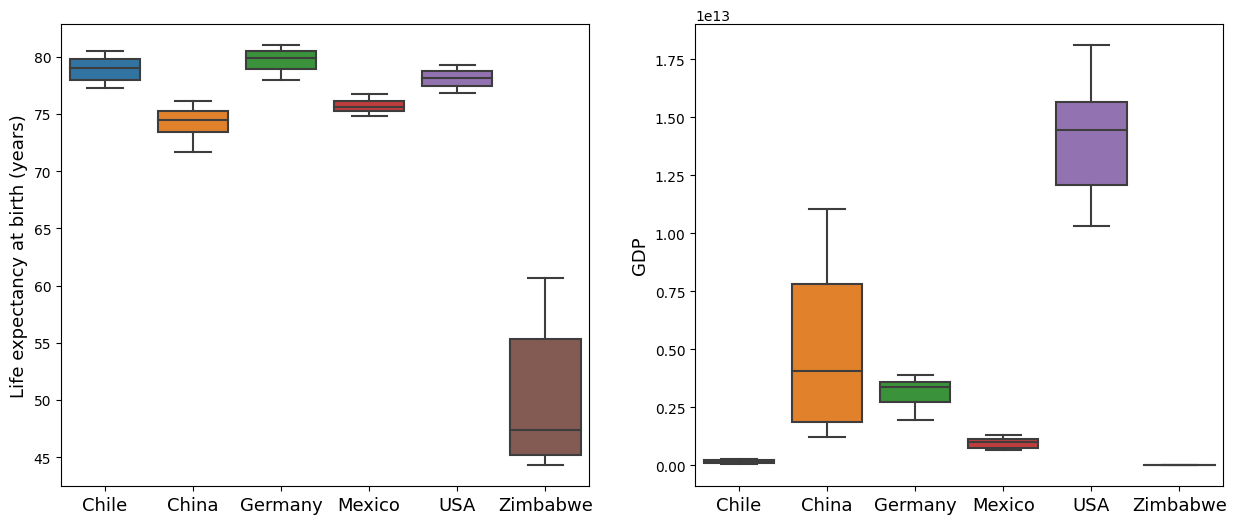

In [7]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(15)
fig.set_figheight(6)

sns.boxplot(data=all_data, x='Country', y='LEAB', ax=axs[0])
sns.boxplot(data=all_data, x='Country', y='GDP', ax=axs[1])

axs[0].tick_params(axis='x', which='major', labelsize=font_size)
axs[1].tick_params(axis='x', which='major', labelsize=font_size)
axs[0].yaxis.label.set_fontsize(font_size)
axs[1].yaxis.label.set_fontsize(font_size)
axs[0].set_xlabel('')
axs[0].set_ylabel('Life expectancy at birth (years)')
axs[1].set_xlabel('')

Simple comparison between countries by Life expectancy at birth is best done using bar plot. If we have the data over few years (and the range is the same for all countries) - we need to calculate average values.

Text(0, 0.5, '')

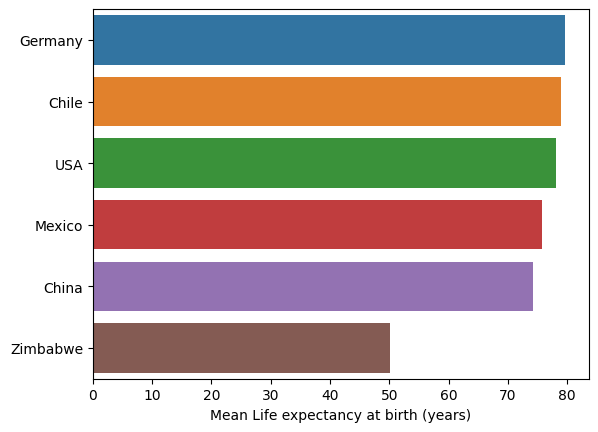

In [8]:
avg_over_country = all_data.groupby('Country').mean()

leab_order = ['Germany', 'Chile', 'USA', 'Mexico', 'China', 'Zimbabwe']
sns.barplot(data=avg_over_country, x='LEAB', y=avg_over_country.index, order=leab_order)
plt.xlabel('Mean Life expectancy at birth (years)')
plt.ylabel('')

What are minima and maxima of Life expectancy at birth in considered time period?

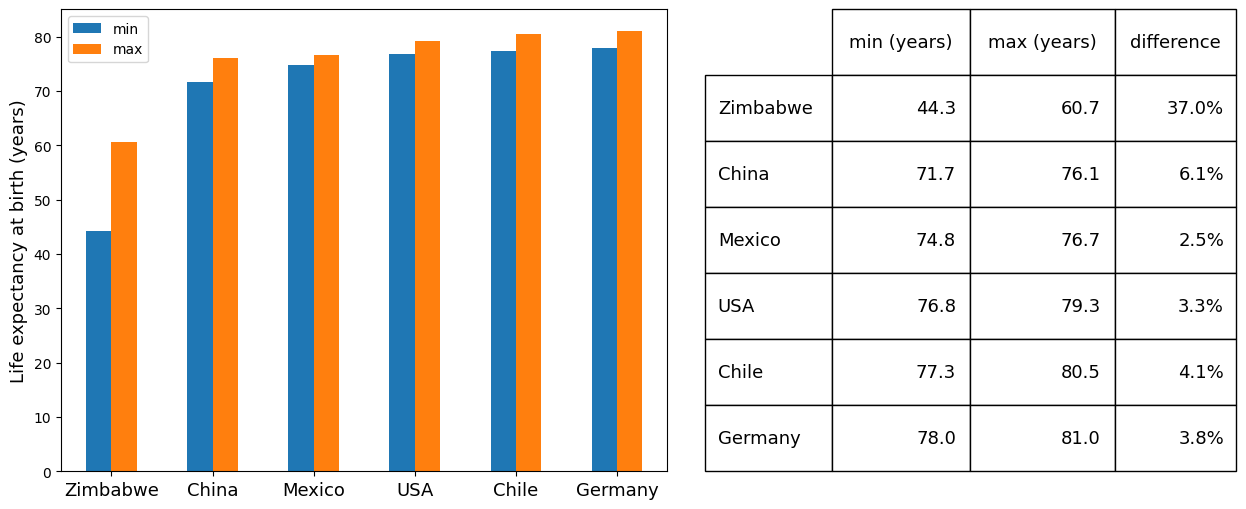

In [9]:
# show Life expectancy statistics by country
life_exp_stat_min = all_data[['Country', 'LEAB']].groupby('Country').min().sort_values(by=['LEAB'])
life_exp_stat_min = life_exp_stat_min.rename(columns={'LEAB': 'min (years)'}, errors="raise")
life_exp_stat_max = all_data[['Country', 'LEAB']].groupby('Country').max().sort_values(by=['LEAB'])
life_exp_stat_max = life_exp_stat_max.rename(columns={'LEAB': 'max (years)'}, errors="raise")
life_exp_stat = pd.concat([life_exp_stat_min, life_exp_stat_max], axis=1)
life_exp_stat['difference'] = round((life_exp_stat['max (years)'] - life_exp_stat['min (years)'])*100/life_exp_stat['min (years)'], 1).apply(str) +'%'

# make both plot and table
font_size = 13
fig = plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2])
              
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

life_exp_stat[['min (years)', 'max (years)']].plot.bar(rot=0, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Life expectancy at birth (years)')
ax1.legend(['min', 'max'])

ax2.axis('off')
data_table = ax2.table(cellText = life_exp_stat.values,
                      rowLabels = life_exp_stat.index,
                      bbox=[0, 0, 1, 1],
                      colLabels=life_exp_stat.columns)
data_table.auto_set_font_size(False)
data_table.auto_set_column_width(col=list(range(len(life_exp_stat.columns))))

# set common font size
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label, data_table] + ax1.get_xticklabels()):
    item.set_fontsize(font_size)

plt.subplots_adjust(wspace=0.3)

The dynamics of Life expectancy at birth is best shown using line plots:

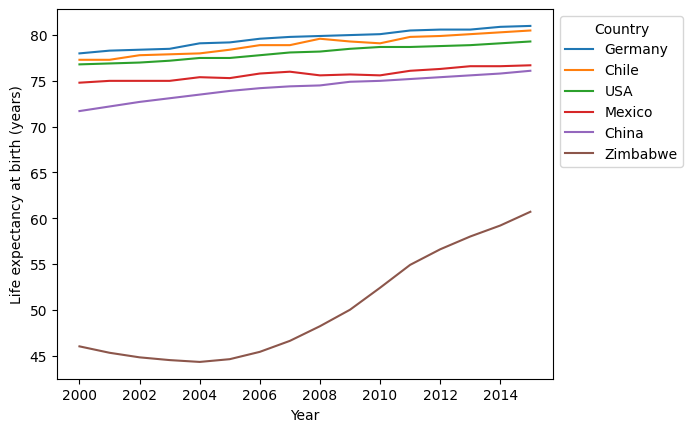

In [10]:
ax = sns.lineplot(data=all_data, x='Year', y='LEAB', hue='Country', hue_order=leab_order)
ax.set_ylabel('Life expectancy at birth (years)')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Simple comparison between countries by GDP is best done using bar plot. If we have the data over few years (and the range is the same for all countries) - we need to calculate average values.

Text(0, 0.5, '')

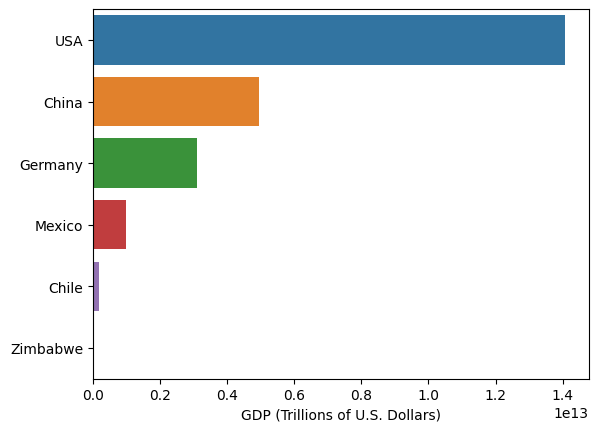

In [11]:
gdp_order = ['USA', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe']
sns.barplot(data=avg_over_country, x='GDP', y=avg_over_country.index, order=gdp_order)
plt.xlabel('GDP (Trillions of U.S. Dollars)')
plt.ylabel('')

What are minima and maxima of GDP in considered time period?

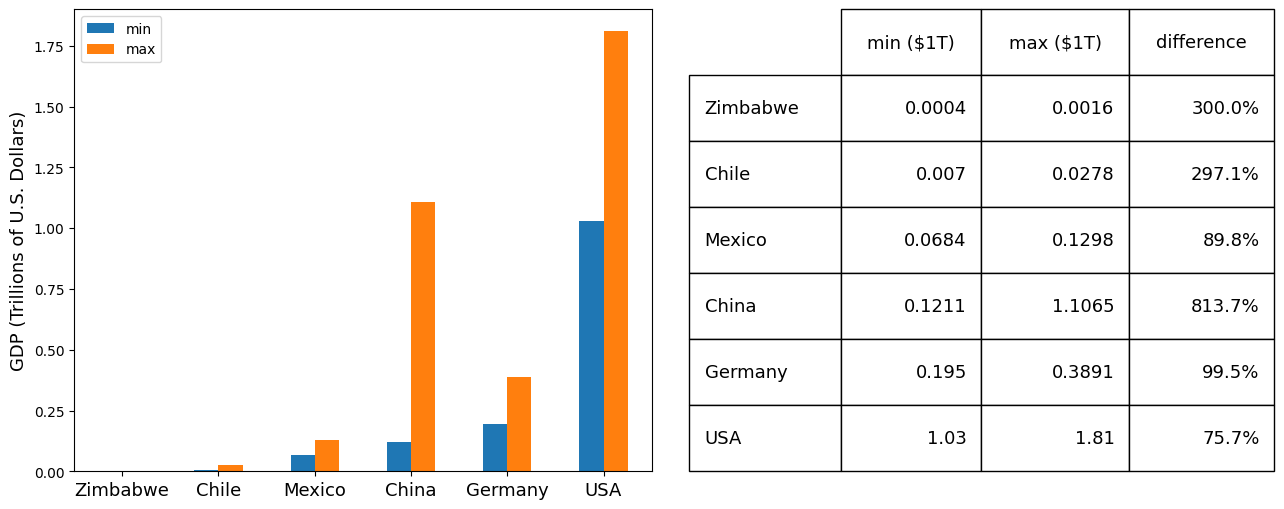

In [12]:
gdp_stat_min = round(all_data[['Country', 'GDP']].groupby('Country').min().sort_values(by=['GDP'])/1e13, 4)
gdp_stat_min = gdp_stat_min.rename(columns={'GDP': 'min ($1T)'}, errors="raise")
gdp_stat_max = round(all_data[['Country', 'GDP']].groupby('Country').max().sort_values(by=['GDP'])/1e13, 4)
gdp_stat_max = gdp_stat_max.rename(columns={'GDP': 'max ($1T)'}, errors="raise")
gdp_stat = pd.concat([gdp_stat_min, gdp_stat_max], axis=1)
gdp_stat['difference'] = round((gdp_stat['max ($1T)'] - gdp_stat['min ($1T)'])*100/gdp_stat['min ($1T)'], 1).apply(str) + '%'


# make both plot and table
font_size = 13
fig = plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 3])
              
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

gdp_stat[['min ($1T)', 'max ($1T)']].plot.bar(rot=0, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('GDP (Trillions of U.S. Dollars)')
ax1.legend(['min', 'max'])

ax2.axis('off')
data_table = ax2.table(cellText = gdp_stat.values,
                      rowLabels = gdp_stat.index,
                      bbox=[0, 0, 1, 1],
                      colLabels=gdp_stat.columns)
data_table.auto_set_font_size(False)
data_table.auto_set_column_width(col=list(range(len(gdp_stat.columns))))

# set common font size
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label, data_table] + ax1.get_xticklabels()):
    item.set_fontsize(font_size)

plt.subplots_adjust(wspace=0.3)

The dynamics of GDP is best shown using line plots:


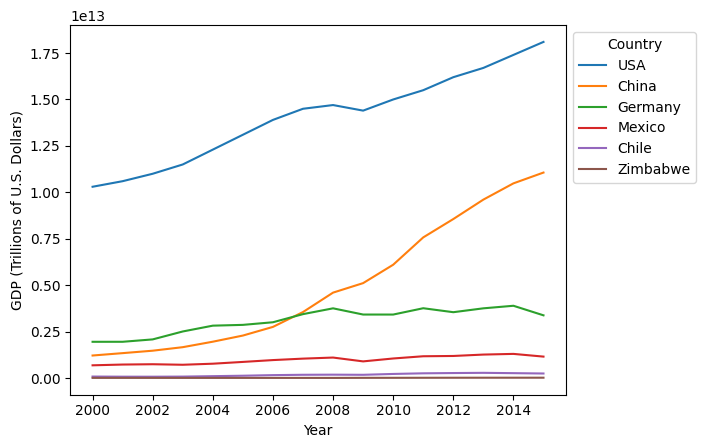

In [13]:
# let's fix hue order so legend would be more readable
ax = sns.lineplot(data=all_data, x='Year', y='GDP', hue='Country', hue_order=gdp_order)
ax.set_ylabel('GDP (Trillions of U.S. Dollars)')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Let's make Life expectancy at birth vs GDP plots for each country:

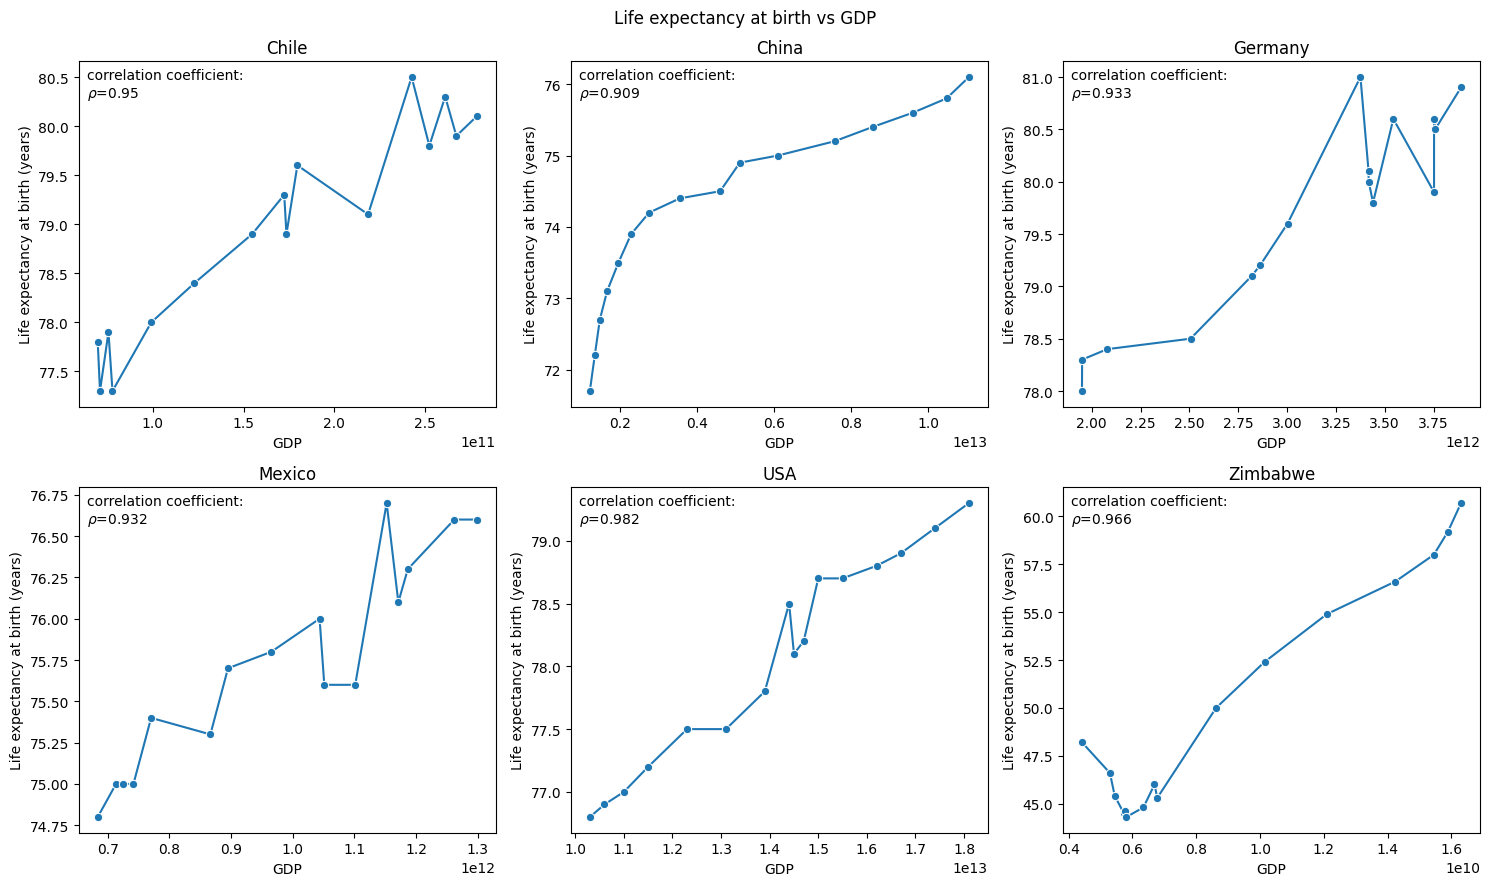

In [14]:
# %%capture --no-display

# draw the data in separate plots
countries = all_data.Country.unique()
f, axes = plt.subplots(2, 3, figsize=(15, 9), sharex=False, sharey=False)
f.suptitle('Life expectancy at birth vs GDP')
# count = 0
for row in range(2):
    for col in range(3):
        corr = round(all_data[all_data['Country'] == countries[row*3 + col]].drop(['Year', 'Country'], axis=1).corr().iloc[0, 1], 3)
        sns.lineplot(ax=axes[row, col],
                    data=all_data[all_data['Country'] == countries[row*3 + col]],
                    y='LEAB',
                    x='GDP',
                    marker='o')
        axes[row, col].text(0.02, 0.98, "correlation coefficient:\n" + r"$\rho$" + '=' + str(corr), ha="left", va="top", transform=axes[row, col].transAxes)
        axes[row, col].set_title(countries[row*3 + col])
        axes[row, col].set_ylabel('Life expectancy at birth (years)')        
f.tight_layout()
plt.show()

### Data provided
The data has been provided using csv formatted file all_data.csv by Codecademy.
The data contains life expectancy and GDP statistics for six countries: Chile, China, Germany, Mexico, United States of America, Zimbabwe. The range of years covers the period from 2000 to 2015 for all countries, no missing records found.

#### Life expectancy at birth data
Five countries out of six have a comparable life expectancies around 75 years. The only outlier is Zimbabwe where average life expectancy is smaller for almost 20 years.

All countries show increase of life expectancy in the considered time period. Most of the countries show small life expectancy increase for about 2..3 years. Larger values observed for China (+4.4 years) and Zimbabwe (+16.4 years).


#### GDP data
There is a large difference in GDP among all countries. The distance between lowest country's GDP and largest is three orders of magnitude.

All countries show increase of their GDP in the considered time period. Most of the countries increased their GDP for about 75..300%, and China shows the largest increase of 813%.


### Life expectancy and GDP correlation

Life expectancy at birth, as a variable, is a statistical estimation which may depend on a lot of factors which are specific to certain territory or country. One of the factors can be country's GDP. The larger is GDP - the better living conditions country can provide for it's citizens. If latter is true, on average, citizen's life duration must be longer.

The Life expectancy at birth vs GDP plots show strong positive correlations between GDPs and life expectancies for all countries considered in this project. The larger is country's GDP - the longer is Life expectancy of the country's citizens. For Chile, Germany, Mexico and USA the Life expectancy - GDP relations visually resemble linear dependencies. In case of China it may be a kind of power function. Zimbabwe shows change of trend at GDP 0.6 billion from down to up. 

Based on this findings it can be concluded that Life expectancy at birth depends on GDP in the considered countries.